<a href="https://colab.research.google.com/github/Cheryl0905/Datathon/blob/main/Olivia_RSM8432_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
# Libraries
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbalanced_pipeline

In [240]:
df = pd.read_excel('/content/SQL_Data.xlsx')
y = df['Fraud']
X = df.drop(columns=['Fraud','no_attending_physicians'])

In [241]:
X['clinic_size'] = X['clinic_size'].map({'Small': 0, 'Large': 1})

In [242]:
X['pay_relative_stay'] = X.apply(lambda row: row['total_amount_reimbursed'] if pd.isna(row['pay_relative_stay']) else row['pay_relative_stay'], axis=1)

In [243]:
y = y.map({'Yes': 1, 'No': 0})

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
X_train

,PID,AttendingPhysician,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
8140,PRV54348,PHY370193,24,195000,4.875000,1666.666667,24,0.666667,0.333333,0.291667,...,0.0,0.041667,0.166667,0.0,0,0.250000,0.041667,0.083333,10,0
5147,PRV51598,PHY319818,1,3000,3.000000,1000.000000,1,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
5853,PRV52142,PHY392744,1,9000,2.000000,4500.000000,1,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1
9899,PRV55907,PHY391371,3,22000,5.333333,1375.000000,3,0.333333,0.666667,0.333333,...,0.0,0.000000,0.000000,0.0,0,0.333333,0.000000,0.000000,3,1
3166,PRV55957,PHY346478,1,7000,3.000000,2333.333333,1,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,PRV57205,PHY379950,1,14000,3.000000,4666.666667,1,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.0,0,0.000000,0.000000,0.000000,1,0
5191,PRV51598,PHY417381,1,3000,9.000000,333.333333,1,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1
5390,PRV51837,PHY347335,1,8000,8.000000,1000.000000,1,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.000000,1,1
860,PRV52065,PHY394773,1,4000,1.000000,4000.000000,1,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,1,1


In [246]:
# Scale the data
scaler = MinMaxScaler()
cols_to_exclude = ['PID', 'AttendingPhysician']
cols_to_scale = [col for col in X_train.columns if col not in cols_to_exclude]
scaled_X_train = X_train[cols_to_scale]
scaled_X_train = pd.DataFrame(scaler.fit_transform(scaled_X_train), columns=scaled_X_train.columns)
scaled_X_train

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,pct_alzheimer,pct_Heartfailure,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.059740,0.045774,0.139286,0.032680,0.074919,0.333333,0.133333,0.145833,0.291667,0.125,...,0.0,0.041667,0.166667,0.0,0.0,0.250000,0.041667,0.083333,0.642857,0.0
1,0.000000,0.000704,0.085714,0.019608,0.000000,0.500000,0.000000,0.000000,0.500000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
2,0.000000,0.002113,0.057143,0.088235,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
3,0.005195,0.005164,0.152381,0.026961,0.006515,0.166667,0.266667,0.166667,0.500000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.000000,0.142857,1.0
4,0.000000,0.001643,0.085714,0.045752,0.000000,0.500000,0.000000,0.500000,0.500000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,0.000000,0.003286,0.085714,0.091503,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8331,0.000000,0.000704,0.257143,0.006536,0.000000,0.000000,0.400000,0.000000,0.500000,0.500,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
8332,0.000000,0.001878,0.228571,0.019608,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
8333,0.000000,0.000939,0.028571,0.078431,0.000000,0.000000,0.400000,0.000000,0.000000,0.500,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0


In [247]:
cols_to_scale = [col for col in X_test.columns if col not in cols_to_exclude]
scaled_X_test = X_test[cols_to_scale]
scaled_X_test = pd.DataFrame(scaler.fit_transform(scaled_X_test), columns=scaled_X_test.columns)
scaled_X_test

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,pay_relative_stay,no_unique_beneficiaries,pct_female_patients,pct_male_patients,pct_renal_disease,pct_alzheimer,pct_Heartfailure,...,pct_pregnancy,pct_skin,pct_musculoskeletal,pct_congenital,pct_perinatal,pct_symptoms,pct_injury,pct_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.000000,0.008629,0.114286,0.050000,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0
1,0.005155,0.005393,0.057143,0.031250,0.005435,0.500000,0.000000,0.250000,0.250000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.000000,0.071429,0.0
2,0.000000,0.003236,0.085714,0.025000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.002697,0.342857,0.005208,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
4,0.000000,0.004854,0.200000,0.016071,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0.067010,0.090497,0.171429,0.024970,0.070652,0.285714,0.214286,0.178571,0.285714,0.071429,...,0.0,0.0,0.000000,0.0,0.0,0.285714,0.357143,0.071429,0.357143,0.0
3569,0.000000,0.006472,0.571429,0.007500,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
3570,0.005155,0.006472,0.071429,0.030000,0.005435,0.000000,0.500000,0.500000,0.250000,0.250000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.071429,1.0
3571,0.237113,0.232445,0.125836,0.026027,0.250000,0.265957,0.234043,0.106383,0.319149,0.170213,...,0.0,0.0,0.148936,0.0,0.0,0.276596,0.148936,0.000000,0.500000,0.0


# Model:

In [248]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [249]:
predictions = model.predict(scaled_X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [250]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6957738595018192

In [251]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79      2303
           1       0.61      0.39      0.48      1270

    accuracy                           0.70      3573
   macro avg       0.67      0.63      0.63      3573
weighted avg       0.68      0.70      0.68      3573



In [252]:
print(confusion_matrix(y_test, predictions))

[[1990  313]
 [ 774  496]]


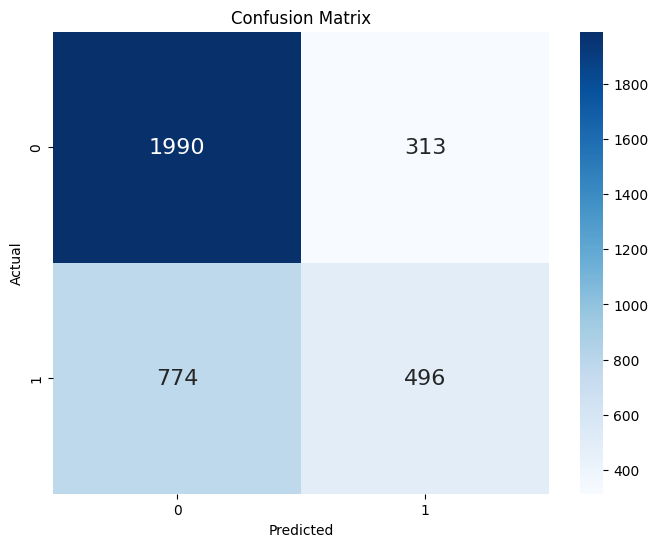

In [253]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [254]:
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': scaled_X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                     Feature  Importance
40                 types_of_patients_handled    3.858745
41                               clinic_size    1.929803
1                    total_amount_reimbursed    1.548023
4                    no_unique_beneficiaries    1.347247
3                          pay_relative_stay    1.268752
0                         total_no_of_claims    1.099095
2                         avg_inpatient_time    0.884895
32                             pct_pregnancy    0.587057
22                            pct_infectious    0.544158
20                               pct_E_Cases   -0.458299
39  pct_beneficiaries_did_not_pay_deductible   -0.394303
33                                  pct_skin   -0.330087
30                             pct_digestive   -0.249152
8                              pct_alzheimer    0.223793
16                          pct_Osteoporasis   -0.219427
5                        pct_female_patients    0.206893
21         

# SMOTE:

In [255]:
over_sampling_smote = SMOTE()
model = LogisticRegression()

In [256]:
pipeline_SMOTE_Log = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', model)
    ])

In [257]:
pipeline_SMOTE_Log.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('classification', LogisticRegression())])

In [258]:
predictions = pipeline_SMOTE_Log.predict(scaled_X_test)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [259]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6700251889168766

In [260]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      2303
           1       0.52      0.84      0.64      1270

    accuracy                           0.67      3573
   macro avg       0.69      0.71      0.67      3573
weighted avg       0.74      0.67      0.68      3573



In [261]:
print(confusion_matrix(y_test, predictions))

[[1332  971]
 [ 208 1062]]


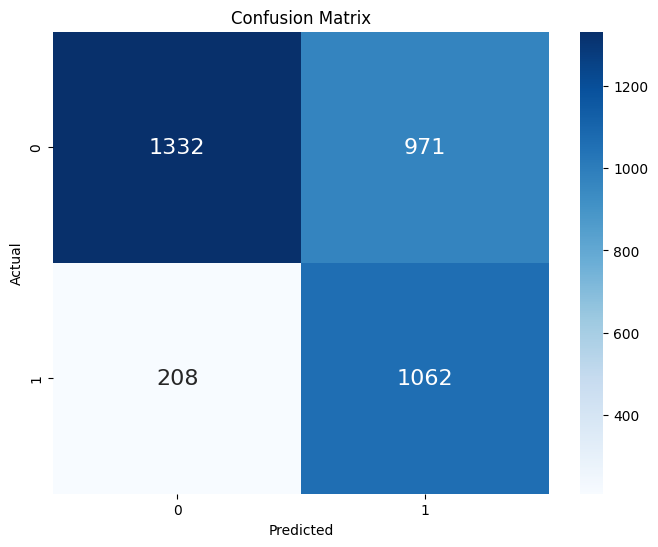

In [262]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree:

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [264]:
pip install dmba

In [265]:
from dmba import classificationSummary

## Without oversample:

In [280]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(scaled_X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [281]:
y_predicted = fullClassTree.predict(scaled_X_test)
accuracy_score(y_test,y_predicted)

0.6120906801007556

In [282]:
classificationSummary(y_test,fullClassTree.predict(scaled_X_test))

Confusion Matrix (Accuracy 0.6121)

       Prediction
Actual    0    1
     0 1501  802
     1  584  686


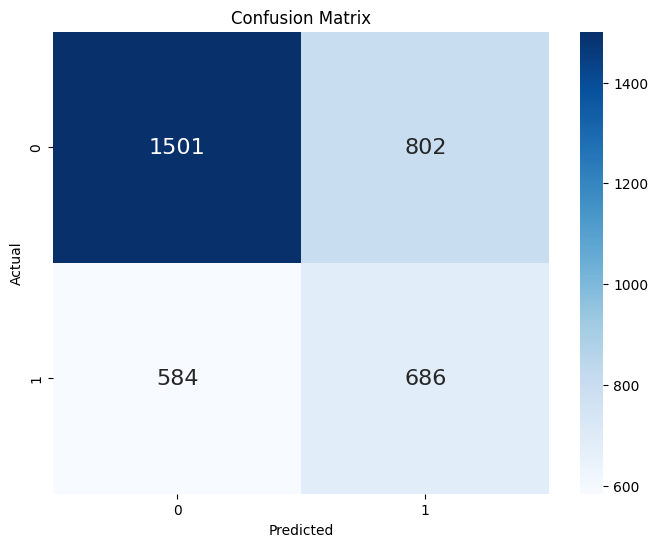

In [283]:
conf_matrix = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [284]:
smallClassTree = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=1)

In [285]:
smallClassTree.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=1)

In [287]:
y_predicted = smallClassTree.predict(scaled_X_test)
accuracy_score(y_test,y_predicted)

0.6717044500419815

In [288]:
classificationSummary(y_test, smallClassTree.predict(scaled_X_test))

Confusion Matrix (Accuracy 0.6717)

       Prediction
Actual    0    1
     0 1566  737
     1  436  834


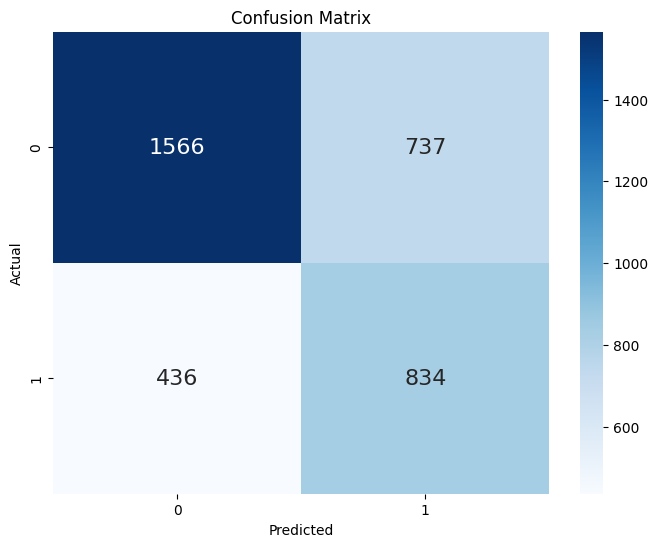

In [290]:
conf_matrix = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## With oversample:

In [266]:
over_sampling_smote = SMOTE()
DT_model = DecisionTreeClassifier(random_state=1)

In [267]:
pipeline_SMOTE_DT = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', DT_model)
    ])

In [268]:
pipeline_SMOTE_DT.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ('classification', DecisionTreeClassifier(random_state=1))])

In [269]:
predictions_DT = pipeline_SMOTE_DT.predict(scaled_X_test)
predictions_DT

array([0, 0, 0, ..., 1, 0, 1])

In [270]:
accuracy_score(y_test,predictions_DT)

0.6137699412258606

In [271]:
# Confusion matrix
classificationSummary(y_test,predictions_DT)

Confusion Matrix (Accuracy 0.6138)

       Prediction
Actual    0    1
     0 1467  836
     1  544  726


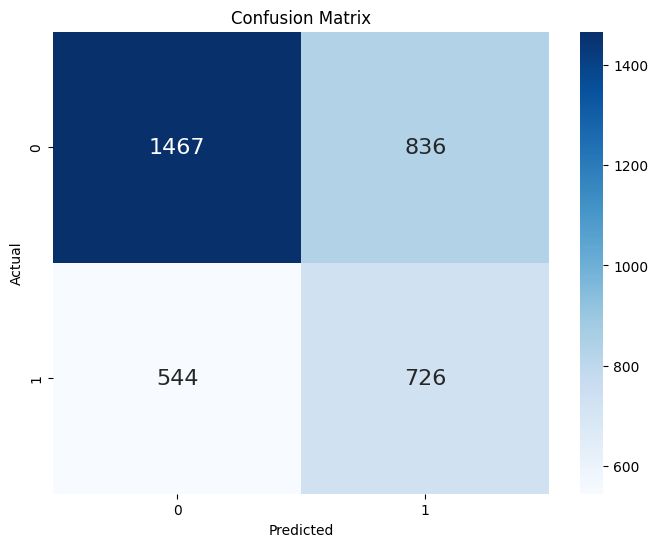

In [272]:
conf_matrix = confusion_matrix(y_test,predictions_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [273]:
small_DT_model = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=1)

In [274]:
pipeline_SMOTE_smallDT = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', small_DT_model)
    ])

In [275]:
pipeline_SMOTE_smallDT.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ('classification',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=100,
                                        random_state=1))])

In [276]:
predictions_smallDT = pipeline_SMOTE_smallDT.predict(scaled_X_test)
predictions_smallDT

array([1, 0, 0, ..., 1, 1, 1])

In [277]:
accuracy_score(y_test,predictions_smallDT)

0.6577106073327735

In [278]:
# Confusion matrix
classificationSummary(y_test,predictions_smallDT)

Confusion Matrix (Accuracy 0.6577)

       Prediction
Actual    0    1
     0 1341  962
     1  261 1009


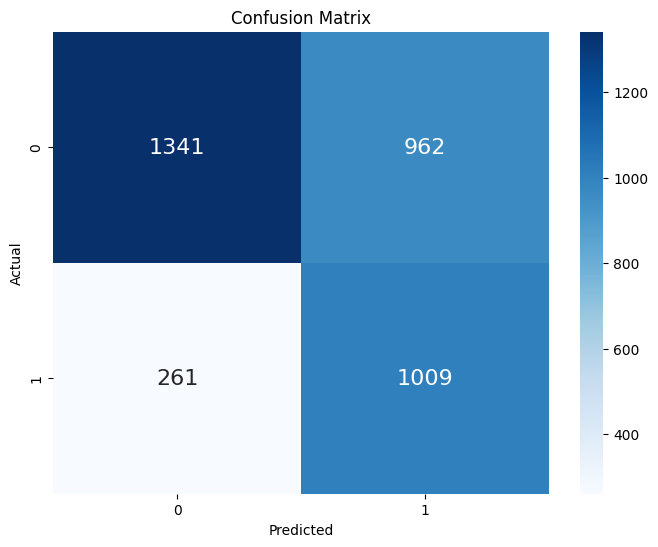

In [279]:
conf_matrix = confusion_matrix(y_test,predictions_smallDT)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()